# ***Digit Recognition with Convolutional Neural Networks (CNN), Deep Neural Networks (DNN), and Simple Neural Networks (SNN)*** 


There are three powerful neural network architectures to tackle the challenging task of digit recognition. Leveraging Convolutional Neural Networks (CNNs), we benefit from specialized layers designed for image-related tasks, allowing the model to automatically extract intricate features from handwritten digits. The journey continues with Deep Neural Networks (DNNs), offering a versatile approach with multiple hidden layers to capture complex relationships within the data. Additionally, we delve into the realm of Simple Neural Networks (SNNs), foundational architectures that demonstrate the neural network basics.

![](http://www.researchgate.net/profile/James-Landay/publication/221518120/figure/fig4/AS:668489102659594@1536391630464/Our-Digits-task-requires-recognition-of-handwritten-digits-Participants-collect-data.png)

## **visualisation and preprocessing**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf # open-source machine learning library developed by Google
from tensorflow import keras# simplifies the process of building and training neural network models
from tensorflow.keras import layers,models# Keras provide functions and classes for building layers and models in neural networks
from tensorflow.keras.callbacks import EarlyStopping# is a callback in Keras that stops training the model when a monitored metric has stopped improving

In [2]:
# Load the data
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [4]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
y_train  = train['label'].values # np array of all the labels (42000, )
X_train = train.drop(columns=['label']).values.reshape(-1,28,28,1)/255.0 # drop the labels and reshape (num_rows, height , width , channel)
X_test = test.values.reshape(-1, 28, 28, 1) / 255.0 # /255.0 --> normalizing these pixel values to the range [0, 1] 


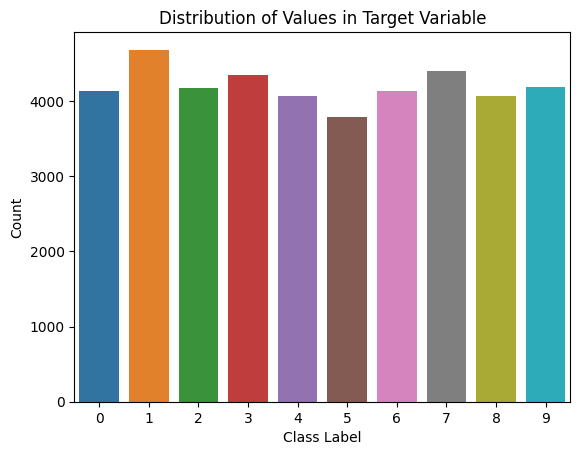

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df, target_variable):
  """Plots the distribution of the values in the target variable of a DataFrame.

  Args:
    df: A DataFrame.
    target_variable: The name of the target variable in the DataFrame.
  """

  sns.countplot(x=target_variable, data=df)
  plt.title("Distribution of Values in Target Variable")
  plt.xlabel("Class Label")
  plt.ylabel("Count")
  plt.show()


def main():

  # Extract the target variable and features
  Y_train = train["label"]

  # Plot the distribution of the values in Y_train
  plot_distribution(train, "label")


if __name__ == "__main__":
  main()


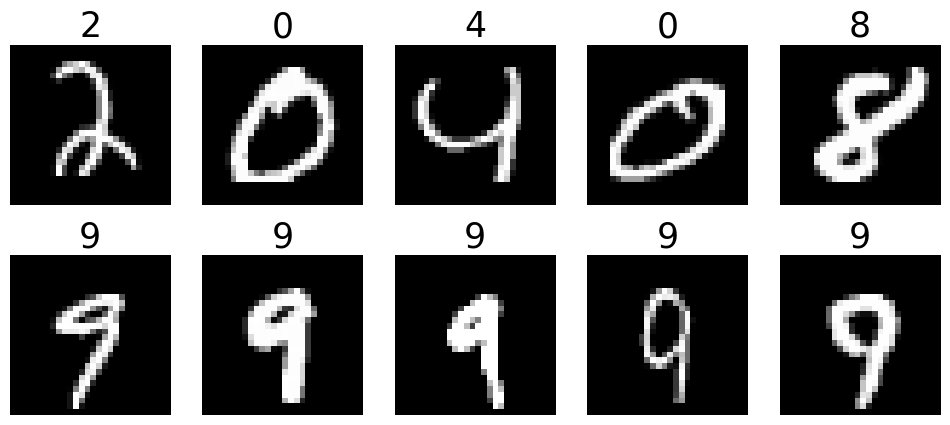

In [8]:
fig , axes  = plt.subplots(2, 5, figsize=(12,5))
axes   = axes.flatten()
idx = np.random.randint(0, 42000, size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i], :].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)
plt.show()

# ***Convolutional Neural Network (CNN)***

In [9]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    #This is a convolutional layer with 32 filters, each with a 3x3 kernel.
    #The activation function used is ReLU (Rectified Linear Unit).
    #The input_shape parameter is set to (28, 28, 1), indicating the shape of the input images (28x28 pixels with 1 channel, as they are grayscale).
    layers.MaxPool2D(pool_size=2),
    #This is a max-pooling layer with a pool size of 2x2.
    #Max-pooling reduces the spatial dimensions of the input.

    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),

    layers.Flatten(),#This layer flattens the output from the previouslayers into a 1D array,
                     #preparing it for fully connected layers.

    
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='softmax')

])
#A fully connected (dense) layer with 64 units and ReLU activation.
#The final output layer with 10 units (corresponding to the 10 digits) and softmax activation. 
#Softmax is used for multi-class classification problems.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [11]:
#optimizer='adam': Adam is an optimization algorithm. It adapts the learning rates during training.
#loss='sparse_categorical_crossentropy': This is the loss function used for multi-class classification problems where the labels are integers (as opposed to one-hot encoded). It measures the difference between the predicted and true labels.
#metrics=['accuracy']: During training, it monitors and displays the accuracy of the model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#EarlyStopping: It's a callback that stops training the model when a monitored metric (in this case, 'val_loss') has stopped improving.
#monitor='val_loss': It monitors the validation loss.
#patience=2: Training will stop after 2 epochs with no improvement in the monitored metric.
#restore_best_weights=True: Restores the model weights from the epoch with the best value of the monitored metric.

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [13]:
#epochs=50: Number of epochs for training (iterations over the entire dataset).
#validation_split=0.1: 10% of the training data is used for validation during training.
#callbacks=[early_stopping]: Early stopping callback is applied.



history = model.fit(
    X_train, y_train, 
    epochs=50,
    validation_split=0.1, 
    callbacks=[early_stopping],
)

Epoch 1/50
1182/1182 [==============================] - 23s 19ms/step - loss: 0.1964 - accuracy: 0.9368 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 2/50
1182/1182 [==============================] - 22s 19ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.0475 - val_accuracy: 0.9857
Epoch 3/50
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0442 - val_accuracy: 0.9871
Epoch 4/50
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0386 - val_accuracy: 0.9886
Epoch 5/50
1182/1182 [==============================] - 21s 18ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0398 - val_accuracy: 0.9886
Epoch 6/50
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0329 - val_accuracy: 0.9890
Epoch 7/50
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.0517 -

In [14]:
predictions = model.predict(X_test)
predictions

875/875 [==============================] - 5s 6ms/step


array([[4.6427675e-09, 1.1809883e-08, 9.9999863e-01, ..., 8.9154599e-07,
        1.7971084e-10, 3.2955347e-11],
       [9.9987698e-01, 2.7122476e-10, 4.1069507e-07, ..., 1.1793558e-06,
        3.7686906e-08, 3.1434120e-05],
       [2.3406386e-09, 8.3380751e-09, 1.2060537e-08, ..., 1.5116603e-06,
        9.9930264e-07, 9.9981952e-01],
       ...,
       [2.9662054e-16, 2.7434281e-12, 5.4574411e-14, ..., 1.7990647e-11,
        1.3490445e-11, 1.0856445e-12],
       [8.5171781e-09, 1.8036979e-09, 1.0792212e-09, ..., 8.5672866e-07,
        5.6476242e-08, 9.9987769e-01],
       [9.5095487e-11, 3.6617256e-09, 9.9999982e-01, ..., 7.6559267e-08,
        6.1166738e-10, 8.7405858e-13]], dtype=float32)

In [15]:
# Convert the model's probability outputs to digit predictions
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([2, 0, 9, ..., 3, 9, 2])

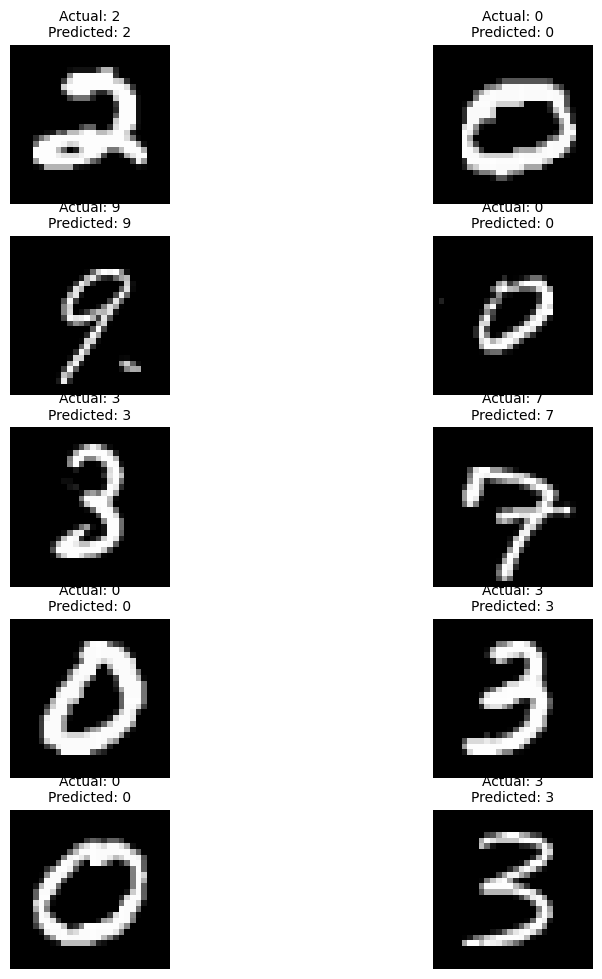

In [16]:
# Display actual and predicted labels with images
fig, axes = plt.subplots(5, 2, figsize=(10, 12))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(X_test[i, :].reshape(28, 28), cmap='gray')
    axes[i].axis('off')  # hide the axes ticks
    axes[i].set_title(f"Actual: {predicted_labels[i]}\nPredicted: {np.argmax(predictions[i])}", color='black', fontsize=10)

plt.show()


# ***Deep Neural Network(DNN)***

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Assuming X_train has shape (num_samples, 28, 28, 1)
# Reshape it to (num_samples, 784) for DNN input
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Define DNN model
dnn_model = Sequential([
    Dense(units=128, activation='relu', input_shape=(784,)),  # Input layer
    Dense(units=64, activation='relu'),  # Hidden layer
    Dense(units=10, activation='softmax')  # Output layer with 10 units for classification
])

# Compile DNN model
dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Display DNN model summary
dnn_model.summary()

# Train DNN model
dnn_history = dnn_model.fit(X_train_flattened, y_train, epochs=10, validation_split=0.1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 0.2978 - accuracy: 0.9142 - val_loss: 0.1492 - val_accuracy: 0.9543
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1214 - accuracy: 0.9615 - val_loss: 0.1125 - val_accurac

In [18]:
predictions = model.predict(X_test)
predictions

875/875 [==============================] - 5s 6ms/step


array([[4.6427675e-09, 1.1809883e-08, 9.9999863e-01, ..., 8.9154599e-07,
        1.7971084e-10, 3.2955347e-11],
       [9.9987698e-01, 2.7122476e-10, 4.1069507e-07, ..., 1.1793558e-06,
        3.7686906e-08, 3.1434120e-05],
       [2.3406386e-09, 8.3380751e-09, 1.2060537e-08, ..., 1.5116603e-06,
        9.9930264e-07, 9.9981952e-01],
       ...,
       [2.9662054e-16, 2.7434281e-12, 5.4574411e-14, ..., 1.7990647e-11,
        1.3490445e-11, 1.0856445e-12],
       [8.5171781e-09, 1.8036979e-09, 1.0792212e-09, ..., 8.5672866e-07,
        5.6476242e-08, 9.9987769e-01],
       [9.5095487e-11, 3.6617256e-09, 9.9999982e-01, ..., 7.6559267e-08,
        6.1166738e-10, 8.7405858e-13]], dtype=float32)

In [19]:
# Convert the model's probability outputs to digit predictions
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([2, 0, 9, ..., 3, 9, 2])

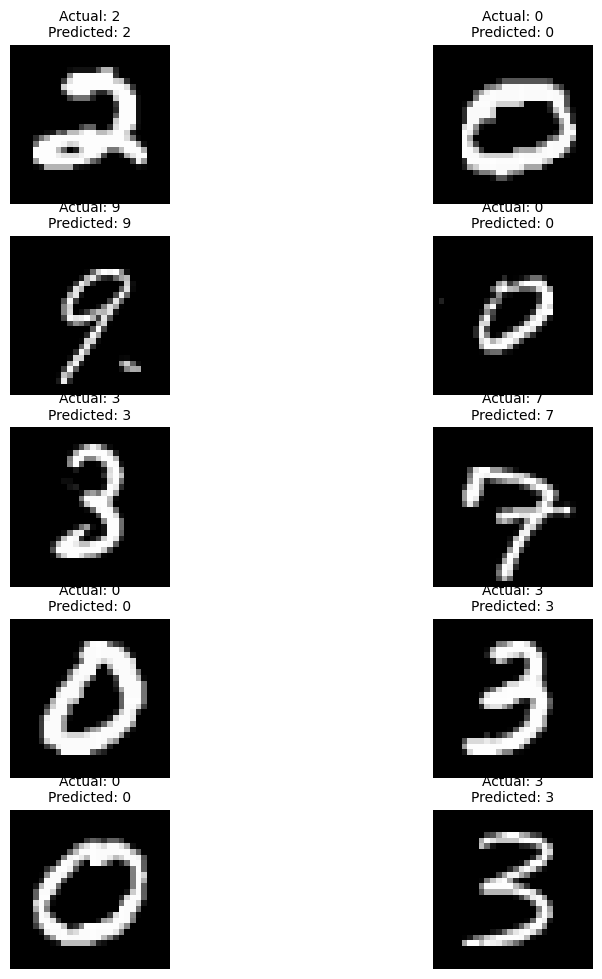

In [20]:
# Display actual and predicted labels with images
fig, axes = plt.subplots(5, 2, figsize=(10, 12))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(X_test[i, :].reshape(28, 28), cmap='gray')
    axes[i].axis('off')  # hide the axes ticks
    axes[i].set_title(f"Actual: {predicted_labels[i]}\nPredicted: {np.argmax(predictions[i])}", color='black', fontsize=10)

plt.show()


# ***Simple Neural Network(SNN)***

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define SNN model
snn_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten layer to convert input to 1D
    Dense(units=10, activation='softmax')  # Output layer with 10 units for classification
])

# Compile SNN model
snn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Display SNN model summary
snn_model.summary()

# Train SNN model (assuming you have X_train and y_train defined)
snn_history = snn_model.fit(X_train, y_train, epochs=10, validation_split=0.1)




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.5478 - accuracy: 0.8578 - val_loss: 0.3512 - val_accuracy: 0.9052
Epoch 2/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.3213 - accuracy: 0.9112 - val_loss: 0.3030 - val_accuracy: 0.9186
Epoch 3/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2909 - accuracy: 0.9187 - val_loss: 0.2892 - val_a

In [22]:
predictions = model.predict(X_test)
predictions

875/875 [==============================] - 6s 6ms/step


array([[4.6427675e-09, 1.1809883e-08, 9.9999863e-01, ..., 8.9154599e-07,
        1.7971084e-10, 3.2955347e-11],
       [9.9987698e-01, 2.7122476e-10, 4.1069507e-07, ..., 1.1793558e-06,
        3.7686906e-08, 3.1434120e-05],
       [2.3406386e-09, 8.3380751e-09, 1.2060537e-08, ..., 1.5116603e-06,
        9.9930264e-07, 9.9981952e-01],
       ...,
       [2.9662054e-16, 2.7434281e-12, 5.4574411e-14, ..., 1.7990647e-11,
        1.3490445e-11, 1.0856445e-12],
       [8.5171781e-09, 1.8036979e-09, 1.0792212e-09, ..., 8.5672866e-07,
        5.6476242e-08, 9.9987769e-01],
       [9.5095487e-11, 3.6617256e-09, 9.9999982e-01, ..., 7.6559267e-08,
        6.1166738e-10, 8.7405858e-13]], dtype=float32)

In [23]:
# Convert the model's probability outputs to digit predictions
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([2, 0, 9, ..., 3, 9, 2])

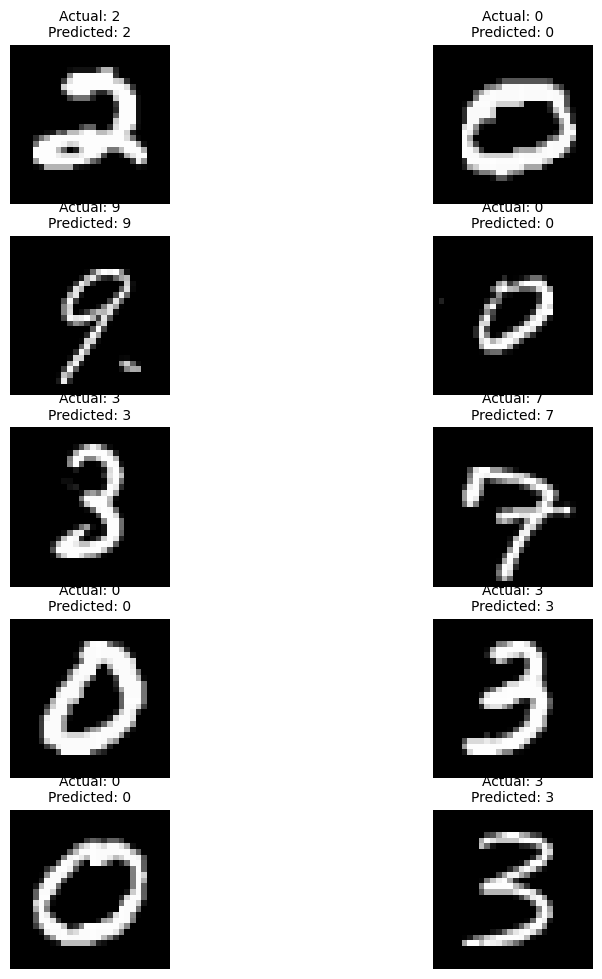

In [24]:
# Display actual and predicted labels with images
fig, axes = plt.subplots(5, 2, figsize=(10, 12))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(X_test[i, :].reshape(28, 28), cmap='gray')
    axes[i].axis('off')  # hide the axes ticks
    axes[i].set_title(f"Actual: {predicted_labels[i]}\nPredicted: {np.argmax(predictions[i])}", color='black', fontsize=10)

plt.show()
